# IMPORT LIBRARIES

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, simpledialog, filedialog
from scipy import stats
from tabulate import tabulate

# EXTRACT DATA AND PERFORM TEST


Summary Statistics:
+----------+---------------+---------+---------+------------+
| Groups   |   Sample Size |     Sum |    Mean |   Variance |
+==========+===============+=========+=========+============+
| X        |          1000 | 49924.8 | 49.9248 |    95.2506 |
+----------+---------------+---------+---------+------------+
| Y        |          1000 | 50326.2 | 50.3262 |    99.7761 |
+----------+---------------+---------+---------+------------+
| Z        |          1000 | 50508   | 50.508  |   100.806  |
+----------+---------------+---------+---------+------------+


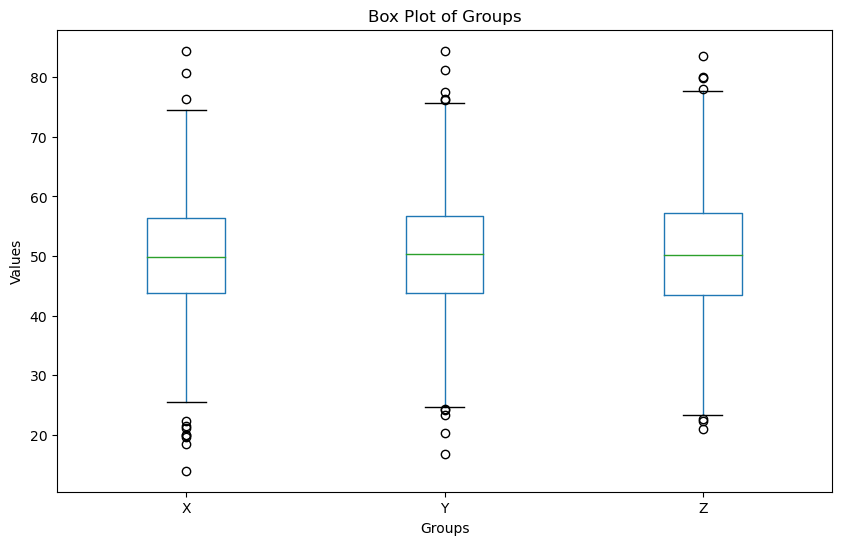

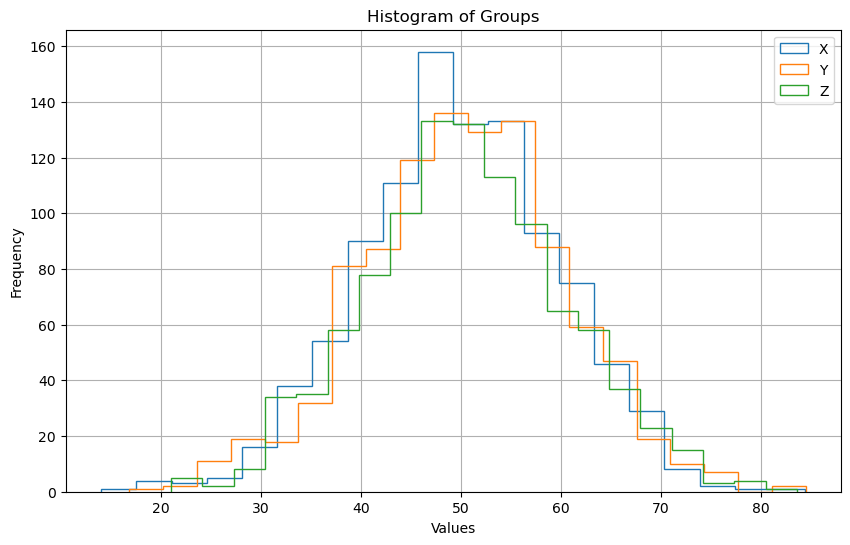


ANOVA Results:
+----------------------+---------------+-----------+----------+
|   Significance Level |   F statistic |   P-value |   F crit |
+======================+===============+===========+==========+
|                 0.05 |         0.903 |     0.405 |  3.00475 |
+----------------------+---------------+-----------+----------+

Fail to reject the null hypothesis: There is no significant difference between groups.


In [107]:
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def calculate_summary_stats(df, group_cols):
    """Calculate summary statistics for each group."""
    summary_data = []
    for col in group_cols:
        group_data = df[col]
        sample_size = len(group_data)
        group_sum = group_data.sum()
        group_mean = group_data.mean()
        group_var = group_data.var()
        summary_data.append([col, sample_size, group_sum, group_mean, group_var])
    return summary_data

def plot_boxplot(df, group_cols):
    """Plot box plots for each group."""
    plt.figure(figsize=(10, 6))
    df.boxplot(column=group_cols)
    plt.title('Box Plot of Groups')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.grid(False)
    plt.show()

def plot_histogram(df, group_cols):
    """Plot histograms for each group."""
    plt.figure(figsize=(10, 6))
    for col in group_cols:
        plt.hist(df[col], bins=20, histtype='step', label=col)

    plt.title('Histogram of Groups')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

def perform_one_way_anova(df, group_cols):
    """Performs one-way ANOVA and displays summary statistics, box plot, histogram, and ANOVA results."""
    try:
        # Prepare data for ANOVA
        data = [df[col] for col in group_cols]

        # Summary Statistics
        summary_data = []
        for col in group_cols:
            sample_size = len(df[col])
            group_sum = df[col].sum()
            group_mean = df[col].mean()
            group_var = df[col].var()
            summary_data.append([col, sample_size, group_sum, group_mean, group_var])

        # Print Summary Statistics Table
        print("\nSummary Statistics:")
        print(tabulate(summary_data, headers=["Groups", "Sample Size", "Sum", "Mean", "Variance"], tablefmt="grid"))

        # Plot Box Plot
        plot_boxplot(df, group_cols)

        # Plot Histogram
        plot_histogram(df, group_cols)

        # Perform one-way ANOVA
        f_stat, p_value = stats.f_oneway(*data)

        # Prepare data for ANOVA table
        alpha = 0.05  # significance level
        anova_data = [
            [alpha, round(f_stat, 3), round(p_value, 3), stats.f.ppf(0.95, len(group_cols) - 1, len(df) - len(group_cols))],
            ]

        # Print ANOVA Table
        print("\nANOVA Results:")
        print(tabulate(anova_data, headers=["Significance Level", "F statistic", "P-value", "F crit"], tablefmt="grid"))

        # Interpret the results
        if p_value < alpha:
            print("\nReject the null hypothesis: There is a significant difference between at least two groups.")
        else:
            print("\nFail to reject the null hypothesis: There is no significant difference between groups.")

    except Exception as e:
        print(f"Error performing one-way ANOVA: {e}")

def get_user_column_selection(df):
    """Gets user input for selecting columns using dialog boxes."""
    root = Tk()
    root.withdraw()  # Hide the main window

    # Get column names from the DataFrame
    columns = df.columns.tolist()

    while True:
        num_groups = simpledialog.askinteger("Input", "Enter the number of groups (must be 3 or more):")
        if num_groups is None:
            return None, None  # User canceled the input
        elif num_groups >= 3:
            break
        else:
            messagebox.showerror("Error", "Please enter 3 or more groups.")

    group_cols = []
    for i in range(num_groups):
        group_col = simpledialog.askstring("Input", f"Enter the column name for group {i + 1}:\nAvailable columns: {', '.join(columns)}")
        if group_col is None:
            return None, None  # User canceled the input
        group_cols.append(group_col)

    return group_cols

def main():
    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    # Get user input for selecting columns
    group_cols = get_user_column_selection(df)
    if group_cols is None:
        print("Error: User canceled the input or entered invalid data.")
        return

    # Perform one-way ANOVA, display tables, and plot box plot
    perform_one_way_anova(df, group_cols)

if __name__ == "__main__":
    main()
